<a href="https://colab.research.google.com/github/Mothesh-M127/mnist-classification/blob/main/DL_exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by : MOTHESH M

Reg No : 21222123066

In [42]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_test.shape

(10000, 28, 28)

In [46]:
single_image= X_train[0]

In [47]:
single_image.shape

(28, 28)

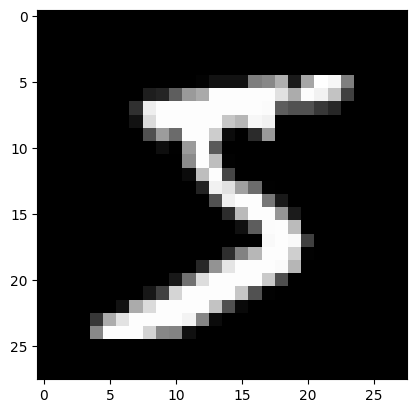

In [48]:
plt.imshow(single_image,cmap='gray')

In [49]:
y_train.shape

(60000,)

In [50]:
X_train.min()

0

In [51]:
X_train.max()

255

In [52]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [53]:
X_train_scaled.min()

0.0

In [54]:
X_train_scaled.max()

1.0

In [55]:
y_train[0]

5

In [56]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [57]:
type(y_train_onehot)

numpy.ndarray

In [58]:
y_train_onehot.shape

(60000, 10)

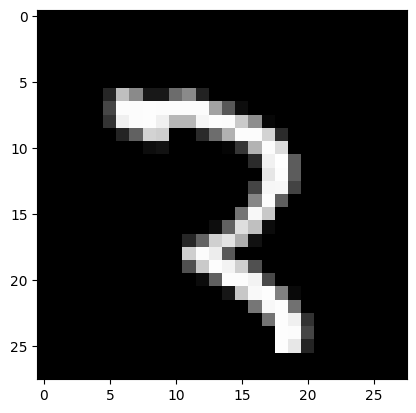

In [59]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [60]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [62]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [64]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [65]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 [==============================] - 36s 38ms/step - loss: 0.2121 - accuracy: 0.9386 - val_loss: 0.0762 - val_accuracy: 0.9755
Epoch 2/5
938/938 [==============================] - 37s 40ms/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0576 - val_accuracy: 0.9812
Epoch 3/5
938/938 [==============================] - 40s 43ms/step - loss: 0.0495 - accuracy: 0.9855 - val_loss: 0.0541 - val_accuracy: 0.9827
Epoch 4/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0466 - val_accuracy: 0.9835
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0527 - val_accuracy: 0.9829


In [66]:
metrics = pd.DataFrame(model.history.history)

In [67]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.212076,0.938567,0.076178,0.9755
1,0.069157,0.979150,0.057558,0.9812
2,0.049549,0.985450,0.054144,0.9827
3,0.038788,0.988217,0.046603,0.9835
4,0.030853,0.990483,0.052691,0.9829


<Axes: >

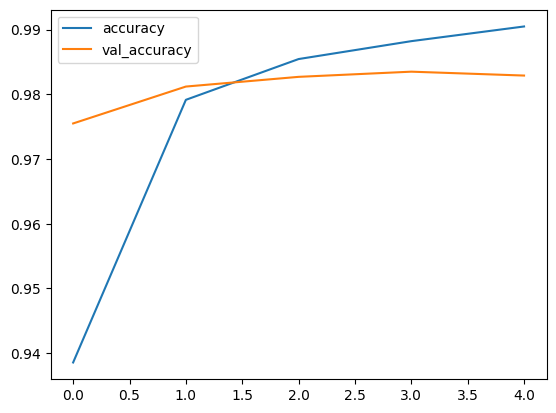

In [68]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

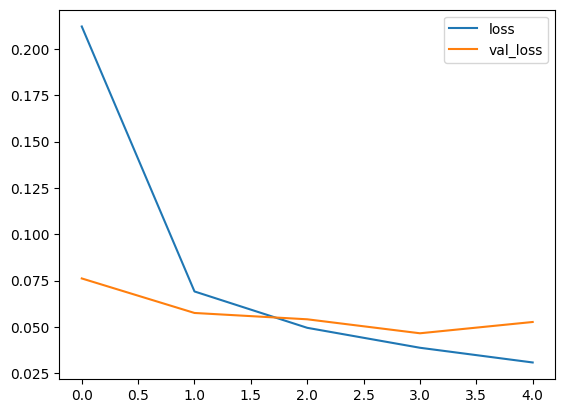

In [69]:
metrics[['loss','val_loss']].plot()

In [70]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [71]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 973    0    2    1    1    1    0    0    1    1]
 [   0 1129    1    1    1    0    1    1    1    0]
 [   2    1 1015    3    1    0    0    7    3    0]
 [   0    0    1 1003    0    2    0    2    2    0]
 [   0    0    2    0  978    0    0    0    0    2]
 [   2    0    1   10    0  876    2    0    1    0]
 [   8    2    1    0    2    5  939    0    1    0]
 [   1    1   10    1    0    1    0 1013    1    0]
 [   7    0    3    2    2    2    1    3  951    3]
 [   1    3    0    9   19    7    0   12    6  952]]


In [72]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Prediction for a single input

In [82]:
img = image.load_img('5.png')

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [83]:
type(img)

PIL.Image.Image

In [84]:
img = image.load_img('5.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [85]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 25ms/step


In [86]:
print(x_single_prediction)

[5]


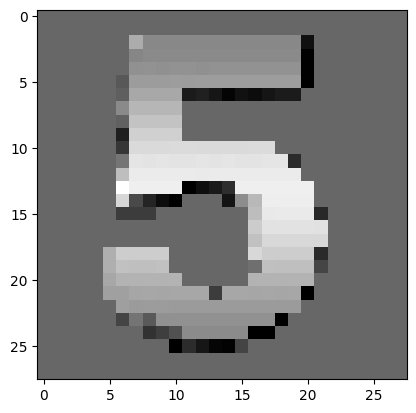

In [87]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [88]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [89]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 28ms/step


In [81]:
print(x_single_prediction)

[8]
